# Advanced Lane Finding
In order to manipulate a car I need to measure how much my lane is curving. To do that I need to map out the lanes in my camera image.

## Compute the Camera Calibration and Distortion Coefficients
Camera image has distortions. This means camera image does not represent perfectly real world objects. There is two types of distortion, Radial Distortion and Tangental Distortion.

To get a curvature of lane lines based on real world I need to correct those distortions, before I map out the lane lines from a camera image,.

To correct distortions I need to calculate some parameters.
 - distortion coefficients (k1, k2, p1, p2, k3)
 - camera matrix ([[fx, 0, xc], [0, fy, yc], [0, 0, 1]]) <= intrinsic parameters
 - extrinsic parameters (rotation and translation vector)
 
To find those parameters I'll do calibration through chessboard images.
 1. detect image points on 2D chessboard image space using findChessboardCorners() function
 2. prepare object points on 3D real world space which indicate same points with 1st step.
 3. get parameters for correcting image distortion using calibrateCamera() function.
 4. finally correct distortions using undistort() function.

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

def arrange_side_by_side(img1, img2, title1, title2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 30))
    ax1.imshow(img1)
    ax1.set_title(title1)
    ax2.imshow(img2, cmap='gray')
    ax2.set_title(title2)
    plt.show()

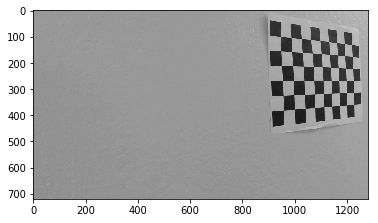

In [30]:
fname = 'camera_cal/calibration16.jpg'
cimg = mpimg.imread(fname)

cimg_origin = np.copy(cimg)
cimg_gray = cv2.cvtColor(cimg, cv2.COLOR_RGB2GRAY)

plt.imshow(cimg_gray, cmap='gray')

In [ ]:
# First step: find image points on 2D chessboard image
pattern_size = (9, 6)
found, image_points_base = cv2.findChessboardCorners(cimg_gray, pattern_size, None)

# checking
cv2.drawChessboardCorners(cimg, pattern_size, image_points_base, found)
arrange_side_by_side(cimg_origin, cimg)
found

In [ ]:
# Second step: prepare object points
object_points_base = np.zeros((pattern_size[0]*pattern_size[1], 3), np.float32)
object_points_base[:,:2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape((-1, 2))

# x = np.arange(pattern_size[0])
# y = np.arange(pattern_size[1])
# xx, yy = np.meshgrid(x,y)
# object_points_base = [[xx[i][j], yy[i][j], 0] for j in range(pattern_size[0]) for i in range(pattern_size[1])]

object_points = []
image_points = []

if found:
    object_points.append(object_points_base)
    image_points.append(image_points_base)

In [ ]:
# Third step: calibrate camera to get parameters for undistortion
try:
    r, cam_mtx, dist_coeff, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, cimg.shape[1::-1], None, None)
except:
    print('Exception occured at calibrateCamera function!!\nPlease check the parameters.')

In [ ]:
# Fourth step: Undistortion
undist_img = cv2.undistort(cimg, cam_mtx, dist_coeff)

In [ ]:
# See the result
arrange_side_by_side(cimg_origin, undist_img)

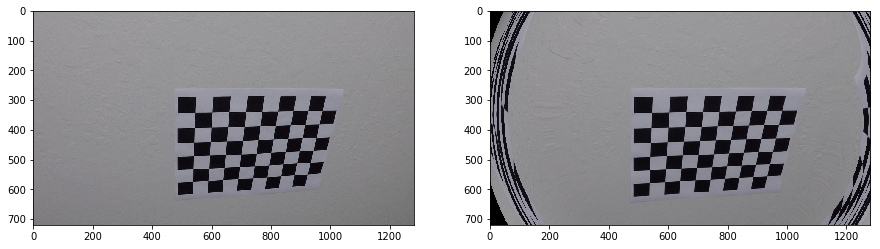

camera_cal\calibration10.jpg
[[1.21928168e+03 0.00000000e+00 6.79720462e+02]
 [0.00000000e+00 1.24267814e+03 3.47981408e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-8.64844751e-01  1.27122868e+01 -1.98964560e-03 -9.89673892e-03
  -7.64249905e+01]]


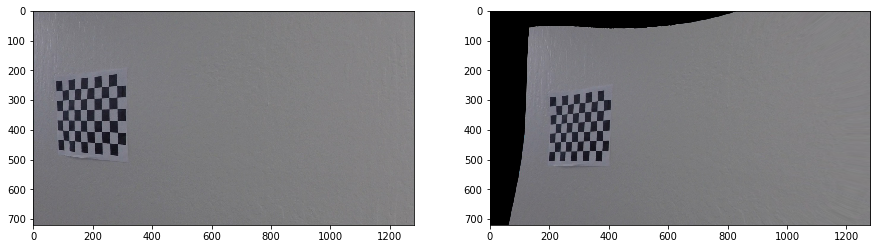

camera_cal\calibration11.jpg
[[1.38582128e+03 0.00000000e+00 7.90889545e+02]
 [0.00000000e+00 1.42613872e+03 5.08574076e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-0.17403078 -8.74200489 -0.14242483 -0.31975393 16.56111599]]


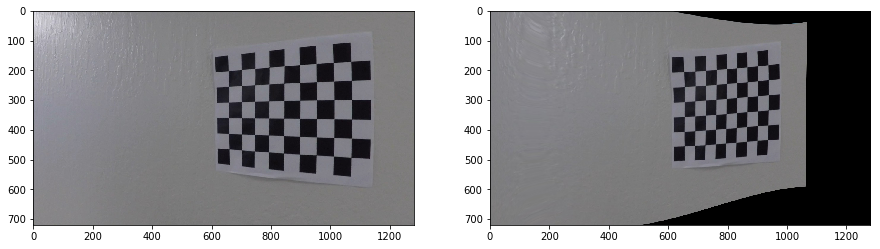

camera_cal\calibration12.jpg
[[4.75869958e+03 0.00000000e+00 5.84277655e+02]
 [0.00000000e+00 1.43446948e+04 2.96069684e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 2.36098553e+01 -2.09041485e+03  2.43048736e-01  1.45436174e+00
  -7.86251819e+03]]


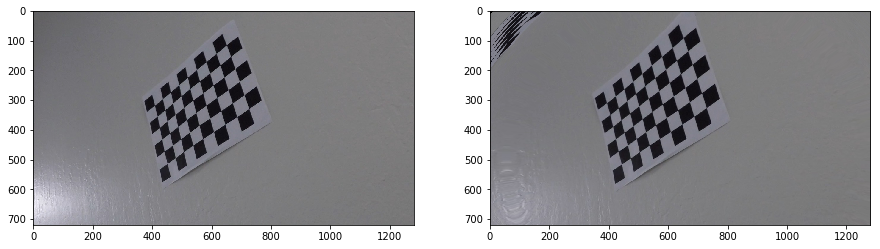

camera_cal\calibration13.jpg
[[1.45995149e+03 0.00000000e+00 6.74644242e+02]
 [0.00000000e+00 1.31213254e+03 5.13307046e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-2.11557178e+00  1.70150661e+01 -5.18377125e-02 -7.68035164e-03
  -6.40442573e+01]]


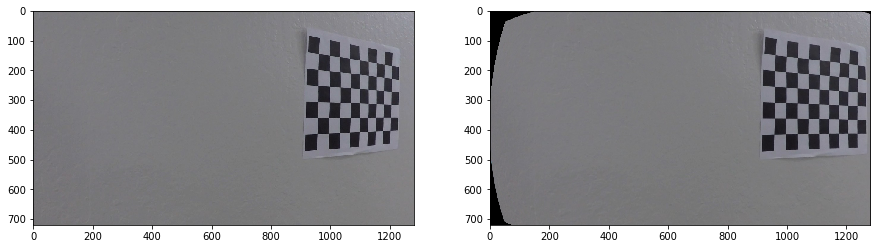

camera_cal\calibration14.jpg
[[1.78108512e+03 0.00000000e+00 6.98876241e+02]
 [0.00000000e+00 1.65633174e+03 3.64176422e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 8.26167226e-01 -3.14874134e+01 -4.50613382e-02 -6.05616421e-04
   1.68009973e+02]]


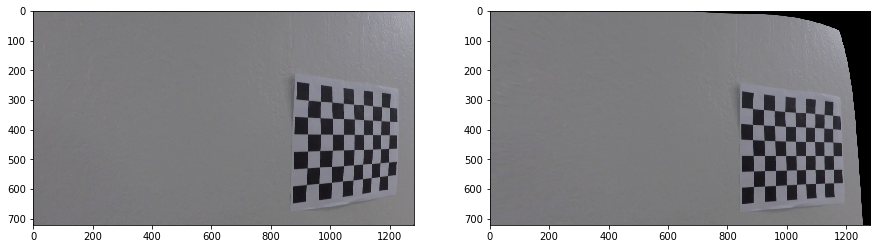

camera_cal\calibration15.jpg
[[1.13825149e+03 0.00000000e+00 5.52019204e+02]
 [0.00000000e+00 1.17969187e+03 5.81593340e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 0.15046989 -4.46527802 -0.07191942  0.13430188  7.16574119]]


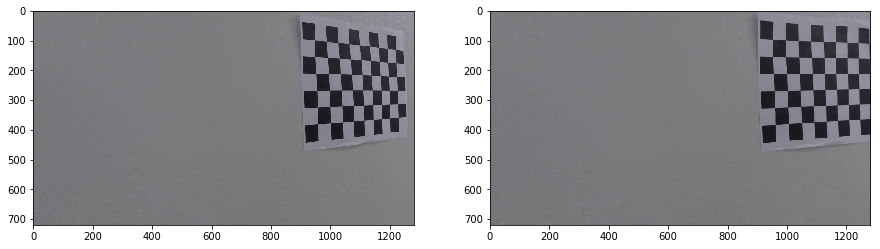

camera_cal\calibration16.jpg
[[319.77432749   0.         688.27616134]
 [  0.         361.05443448 422.92458834]
 [  0.           0.           1.        ]]
[[-0.01426672 -0.01170483 -0.00784124  0.0038167   0.00181477]]


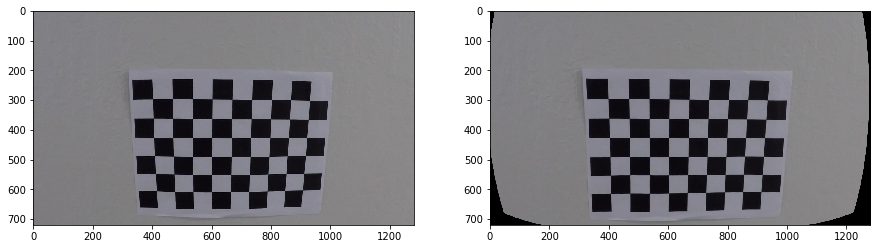

camera_cal\calibration17.jpg
[[725.78003847   0.         638.74139918]
 [  0.         723.8722024  294.10156966]
 [  0.           0.           1.        ]]
[[-0.07808877 -0.30037519  0.00981726  0.0071851   0.50492163]]


camera_cal\calibration18.jpg
[[531.82307665   0.         644.64691661]
 [  0.         528.57606793 316.87910505]
 [  0.           0.           1.        ]]
[[-0.13753137  0.26046612  0.00518895  0.00232639 -0.24846897]]


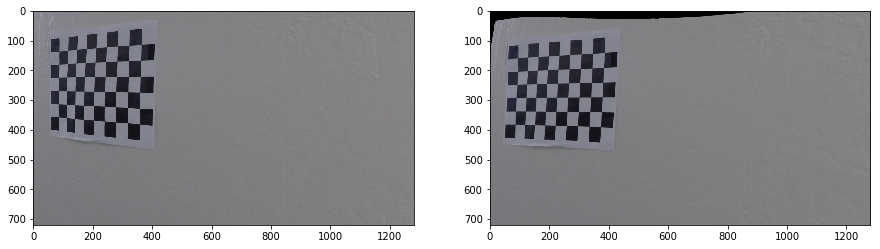

camera_cal\calibration19.jpg
[[1.38402350e+03 0.00000000e+00 6.49367168e+02]
 [0.00000000e+00 1.41090751e+03 4.68062854e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-0.03274551 -6.55211175 -0.11326691 -0.08201944 15.85978934]]


camera_cal\calibration2.jpg
[[776.35181962   0.         646.11016013]
 [  0.         743.54795686 207.6664418 ]
 [  0.           0.           1.        ]]
[[-0.15421396  0.06832906  0.02152702  0.00281579 -0.00624638]]


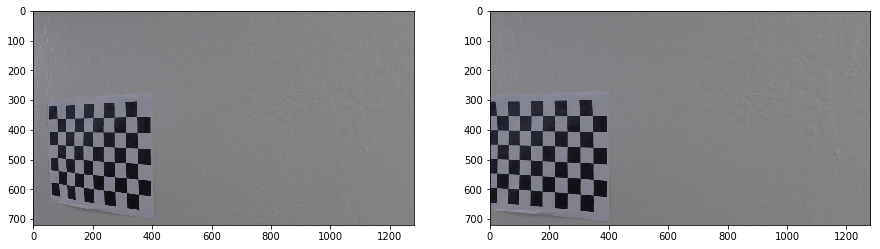

camera_cal\calibration20.jpg
[[1.09775212e+03 0.00000000e+00 7.29692766e+02]
 [0.00000000e+00 1.10601549e+03 2.33822718e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-0.50375701  0.52746533  0.04869096 -0.03223263 -0.50069725]]


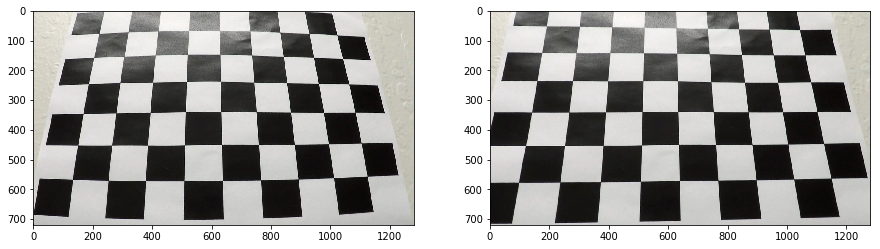

camera_cal\calibration3.jpg
[[1.20471247e+03 0.00000000e+00 6.63053880e+02]
 [0.00000000e+00 1.19331346e+03 3.82490241e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-0.31746306  0.22204184  0.0091647   0.00095689 -0.0953597 ]]


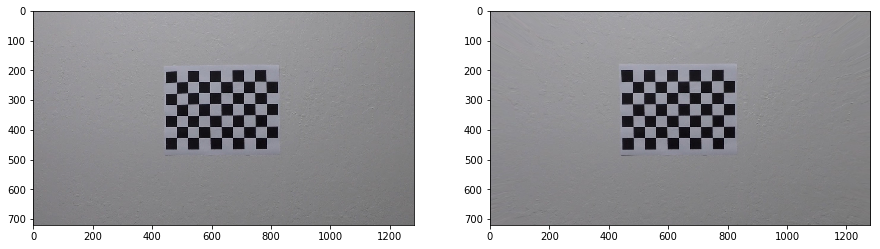

camera_cal\calibration6.jpg
[[5.18616135e+03 0.00000000e+00 6.35606703e+02]
 [0.00000000e+00 5.22437379e+03 4.58935577e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-4.37559220e+00 -5.20904509e+02 -5.40091193e-02  5.12872485e-02
  -3.16656465e+00]]


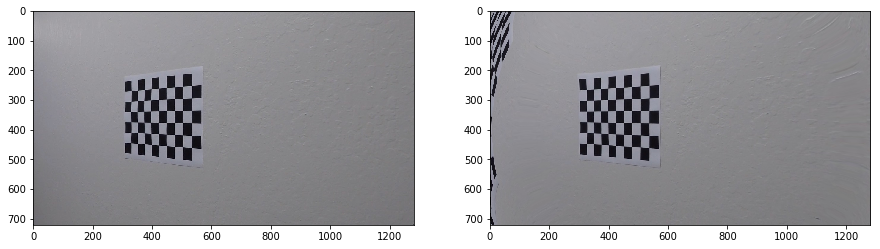

camera_cal\calibration7.jpg
[[715.9924415    0.         692.15318772]
 [  0.         828.09527863 402.02430652]
 [  0.           0.           1.        ]]
[[-0.29465312  0.28375659 -0.00340468 -0.03733222 -0.66579231]]


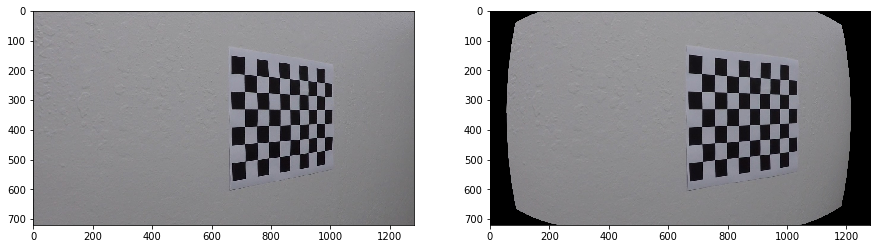

camera_cal\calibration8.jpg
[[275.88690057   0.         621.75095434]
 [  0.         342.19723943 354.48044158]
 [  0.           0.           1.        ]]
[[-0.01976358 -0.01224876  0.00328374 -0.00334501  0.00503028]]


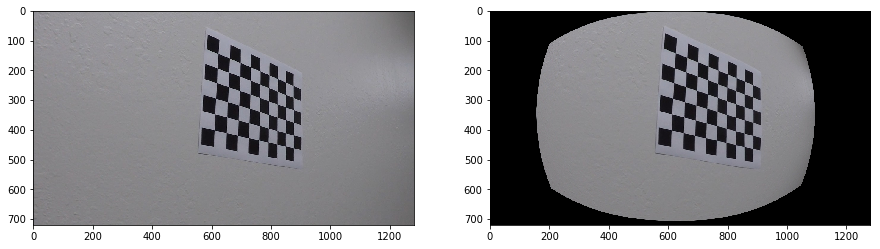

camera_cal\calibration9.jpg
[[1.27254893e+03 0.00000000e+00 6.14583331e+02]
 [0.00000000e+00 1.23448639e+03 3.48495279e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 9.85612389e-02 -2.23779055e+01  7.34337527e-03 -2.58415144e-02
   3.07944829e+02]]


In [35]:
# Loop through all the images in camera_cal directory
images = glob.glob('camera_cal/*.jpg')
pattern_size = (9, 6)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

obj_points = np.zeros((pattern_size[0]*pattern_size[1], 3), np.float32)
obj_points[:,:2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape((-1, 2))


for fname in images:
    img = mpimg.imread(fname)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    found, img_points = cv2.findChessboardCorners(img_gray, pattern_size, None)
    
    object_points = []
    image_points = []
    if found:
        cv2.cornerSubPix(img_gray,img_points,(11,11),(-1,-1),criteria)
        object_points.append(obj_points)
        image_points.append(img_points)
        try:
            r, cam_mtx, dist_coeff, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, img.shape[1::-1], None, None)
        except:
            print('Exception occured at calibrateCamera function!!\nPlease check the parameters.')
            continue
        
        undist_img = cv2.undistort(img, cam_mtx, dist_coeff)
        arrange_side_by_side(img, undist_img)
        print(fname)
        print(cam_mtx)
        print(dist_coeff)
        
#        img = cv2.drawChessboardCorners(img, pattern_size, img_points, found)
#        cv2.imshow('img', img)
#        cv2.waitKey(500)
#cv2.destroyAllWindows()

## Create Thresholded Binary Image

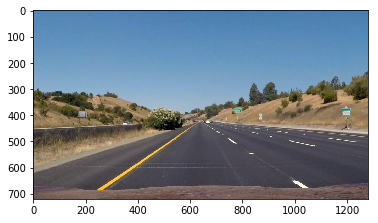

In [11]:
img = mpimg.imread('test_images/straight_lines1.jpg')

plt.imshow(img)

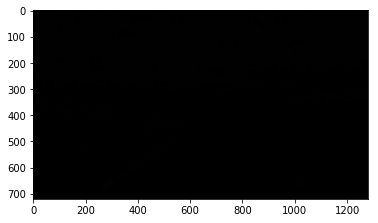

In [10]:
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
h = hls[:,:,0]
l = hls[:,:,1]
s = hls[:,:,2]

threshold = 100
binary = np.zeros_like(hls)
binary[s>threshold] = 1
plt.imshow(binary)

In [67]:
def filter_sobel(img, orientation='x'):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orientation == 'x':
        sobel = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0)
    elif orientation == 'y':
        sobel = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1)
    else:
        print("Unknown value of orientation.")
        return None
    abs_img = np.absolute(sobel)
    return abs_img * 255 / np.max(abs_img)

def filter_sobel_gradient_magnitude(img, ksize=3):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=ksize)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=ksize)
    grad_mag = np.sqrt(sobelx**2 + sobely**2)
    return grad_mag * 255 / np.max(grad_mag)

def filter_gradient_direction(img, ksize=3):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    abs_sobelx = np.absolute(cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=ksize))
    abs_sobely = np.absolute(cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=ksize))
    return np.arctan2(abs_sobely, abs_sobelx)
    
def create_binary_image(img, thresh_min=50, thresh_max=100):
    binary = np.zeros_like(img)
    binary[(img > thresh_min) & (img < thresh_max)] = 1
    return binary

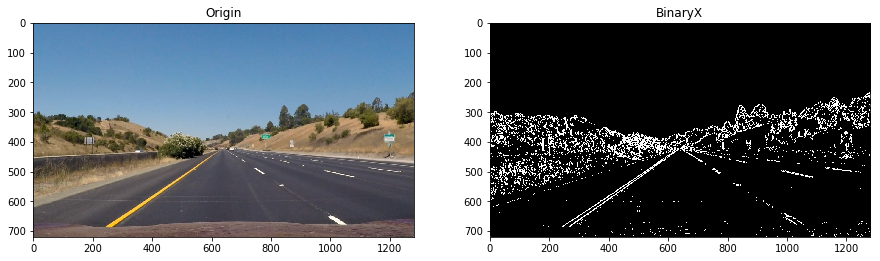

In [110]:
# apply the Sobel filter for y direction
sobelx = filter_sobel(img, 'x')
binary_sobelx = create_binary_image(sobelx, 15, 140)

arrange_side_by_side(img, binary_sobelx, 'Origin', 'BinaryX')

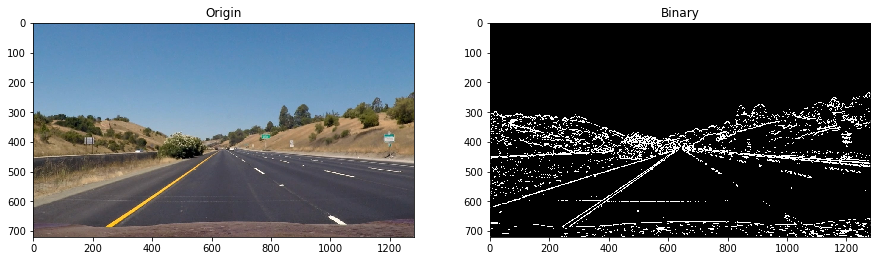

In [108]:
# apply the Sobel filter for y direction
sobely = filter_sobel(img, 'y')
binary_sobely = create_binary_image(sobely, 20, 150)

arrange_side_by_side(img, binary_sobely, 'Origin', 'Binary')

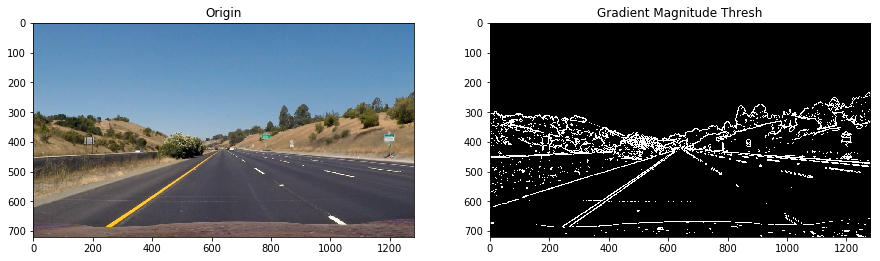

In [124]:
grad_mag = filter_sobel_gradient_magnitude(img, ksize=5)
binary_grad_mag = create_binary_image(grad_mag, 30, 170)

arrange_side_by_side(img, binary_grad_mag, 'Origin', 'Gradient Magnitude Thresh')

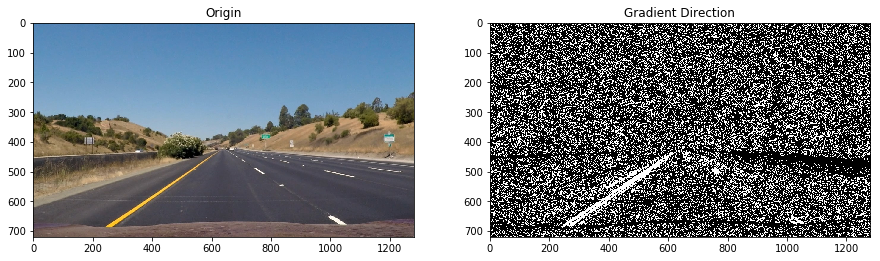

In [146]:
grad_dir = filter_gradient_direction(img, ksize=11)
binary_grad_dir = create_binary_image(grad_dir, 0.75, 1.2)

arrange_side_by_side(img, binary_grad_dir, 'Origin', 'Gradient Direction')

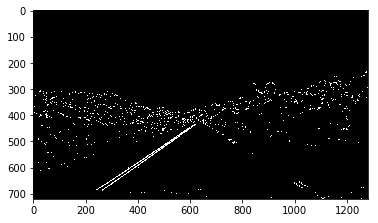

In [154]:
binary = np.zeros_like(binary_grad_dir)
binary[((sobelx == 1) & (sobely == 1)) | ((binary_grad_mag == 1) & (binary_grad_dir == 1))] = 1

plt.imshow(binary, cmap='gray')